Accuracy: 78.77%


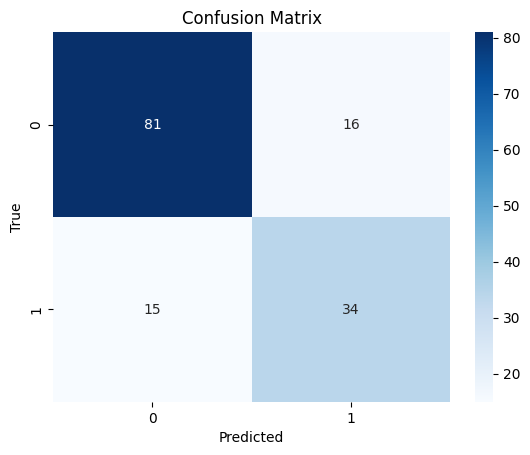

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for c in self.classes:
            X_c = X[y == c]
            self.parameters.append((np.mean(X_c, axis=0), np.var(X_c, axis=0)))

    def _pdf(self, X, mean, var):
        return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(X - mean) ** 2 / (2 * var))

    def predict_class(self, sample):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(len(X_train[y_train == c]) / len(X_train))
            posterior = np.sum(
                np.log(self._pdf(sample, self.parameters[i][0], self.parameters[i][1])))
            posterior += prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return [self.predict_class(x) for x in X]


if __name__ == "__main__":
    # Load the dataset
    df = pd.read_csv("diabetes.csv", sep=",", header=0)

    # Remove the SkinThickness column
    df = df.drop("SkinThickness", axis=1)

    # Impute missing values with the mean
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Splitting data into features and outcome
    X = df.drop('Outcome', axis=1).values
    y = df['Outcome'].values

    # Use Isolation Forest to handle outliers
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(X)

    # Remove outliers from the data
    X_no_outliers = X[outliers != -1]
    y_no_outliers = y[outliers != -1]

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_no_outliers)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_no_outliers, test_size=0.2, random_state=42, stratify=y_no_outliers)

    # Define the Naive Bayes algorithm (Gaussian Naive Bayes)

    # Train the Naive Bayes model (Gaussian Naive Bayes)
    naive_bayes_classifier = GaussianNaiveBayes()
    naive_bayes_classifier.fit(X_train, y_train)

    # Predict using the Naive Bayes model
    y_pred = naive_bayes_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    # plt.show()

    # Save the trained Naive Bayes model and scaler using joblib
    joblib.dump([naive_bayes_classifier, accuracy, scaler],
                'naive_bayes_model.pkl')
